In [2]:
import numpy as np
from data_loader import load_npy
import matplotlib.pyplot as plt
from cvxopt import matrix
%matplotlib notebook

# Norm approximation

In [3]:
a1, b1 = load_npy(1)
a2, b2 = load_npy(2)
a3, b3 = load_npy(3)
a4, b4 = load_npy(4)
a5, b5 = load_npy(5)

In [4]:
from norm_approximation import solve_linf, solve_lone, solve_ltwo

In [5]:
x, s = solve_lone(a3, b3)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.1009e-15  1e+03  4e+00  4e-15  1e+00
 1:  7.0053e+01  7.0054e+01  2e+02  6e-01  7e-15  2e-01
 2:  1.2442e+02  1.2442e+02  6e+01  2e-01  6e-14  6e-02
 3:  1.3688e+02  1.3688e+02  3e+01  9e-02  7e-14  2e-02
 4:  1.4170e+02  1.4170e+02  1e+01  3e-02  7e-14  1e-02
 5:  1.4362e+02  1.4362e+02  4e+00  1e-02  1e-13  4e-03
 6:  1.4438e+02  1.4438e+02  2e+00  6e-03  2e-13  2e-03
 7:  1.4471e+02  1.4471e+02  5e-01  2e-03  3e-13  5e-04
 8:  1.4479e+02  1.4479e+02  3e-01  9e-04  3e-13  3e-04
 9:  1.4484e+02  1.4484e+02  1e-01  3e-04  2e-12  1e-04
10:  1.4486e+02  1.4486e+02  2e-02  8e-05  1e-12  2e-05
11:  1.4486e+02  1.4486e+02  5e-03  2e-05  1e-12  5e-06
12:  1.4486e+02  1.4486e+02  4e-04  1e-06  4e-12  3e-07
13:  1.4486e+02  1.4486e+02  4e-06  1e-08  4e-12  4e-09
Optimal solution found.


In [6]:
n=256
m=2*n
czs = np.zeros(n)
cones = np.ones(m)
cstack = np.hstack((czs, cones))
c3 = matrix(cstack)
print(c3.T*x)

[ 1.45e+02]



Optimal value is 145

# Barrier Methods

In [7]:
from central_path import *

In [8]:
a, b = load_npy(3)
m = a.shape[0]
n = a.shape[1]
at, bt = build_l1_tildes(a, b)
c1 = np.zeros(n)
c2 = np.ones(m)
ct = np.hstack((c1, c2))
ct = matrix(ct)

In [9]:
x = first_order_method((at, bt), central_path, central_path_grad, ct, 0.1, m, n, 1.)

     pcost       dcost       gap    pres   dres   k/t
 0:  5.0848e+00  2.4176e+01  6e+03  4e+00  3e+03  1e+00
 1: -3.6572e+11  1.6414e+01  2e+03  2e+00  1e+03  5e+00
Certificate of dual infeasibility found.


D:\Work\IIB\4M17\Convex Optimisation\central_path.py:18: RuntimeWarning: invalid value encountered in log
  term2 = np.sum(np.log(b - (a*x)), axis=0)


In [15]:
print(c3.T*x[0])

[ 1.06e+03]



In [12]:
len(x[2])

709

<IPython.core.display.Javascript object>


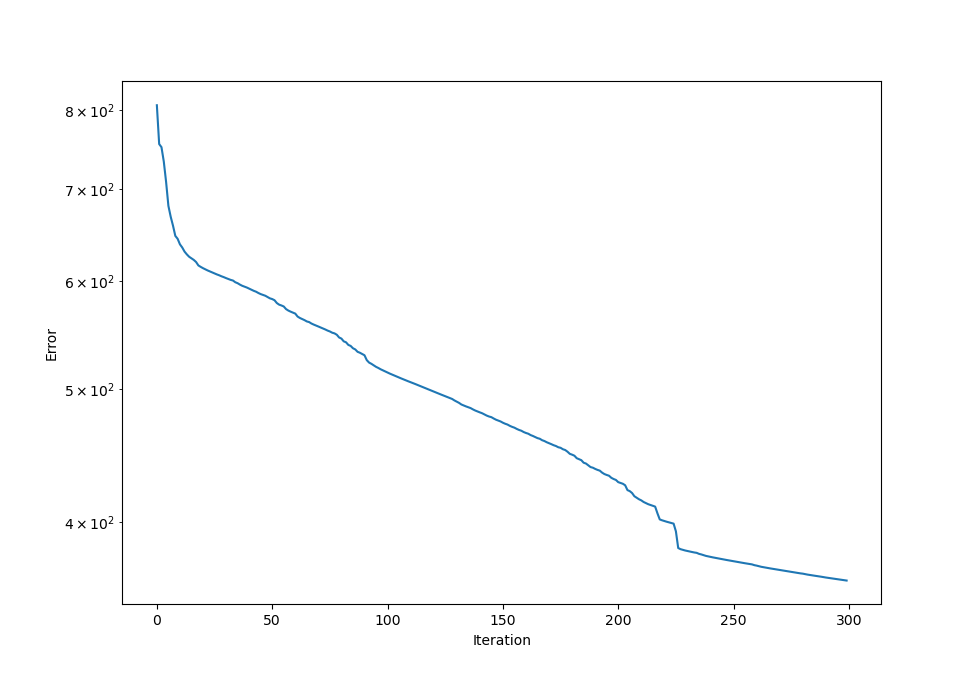

Text(0, 0.5, 'Error')

In [17]:
plt.figure()
plt.semilogy(np.arange(len(x[2]))[:300], x[2][:300])
plt.xlabel('Iteration')
plt.ylabel('Error')